<a href="https://colab.research.google.com/github/Greta-gerasimov/PyT/blob/L2_feed_f/PT_2%2Bimprov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import torch
import numpy as np

from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

из ДР №1:


---

*   обычная функция нахождения производной по х
*   правильно ли я понимаю, что для дифференциирования нужно было использовать PT





In [ ]:
def func(x, z, t):
  return x ** 3 + z - 75 * t

#точка

x = 1
z = 0.5
t = 2

#дифференцирование

dy_dx = (3 * x ** 2)

#вычисление производной в точке по x

derivative = dy_dx

print('Производная функции в точке (1, 0.5, 2):', derivative)

Производная функции в точке (1, 0.5, 2): 3


In [ ]:
x = torch.tensor([1.], requires_grad=True)
z = torch.tensor([0.5], requires_grad=True)
t = torch.tensor([2.], requires_grad=True)

y = x**3 + z - 75*t

y.backward()

print('dy/dx: ', x.grad)
print('dy/dz: ', z.grad)
print('dy/dt: ', t.grad)

dy/dx:  tensor([3.])
dy/dz:  tensor([1.])
dy/dt:  tensor([-75.])


#HW2



In [ ]:
# Сделаем необходимые импорты

In [ ]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

In [ ]:
FOLDER_PATH = 'C:/Users/Kate/Desktop/PT/'
train_dataset = torchvision.datasets.CIFAR10(root=FOLDER_PATH,
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

100%|██████████| 170498071/170498071 [00:01<00:00, 99442954.99it/s] 


Extracting C:/Users/Kate/Desktop/PT/cifar-10-python.tar.gz to C:/Users/Kate/Desktop/PT/
torch.Size([3, 32, 32])
6


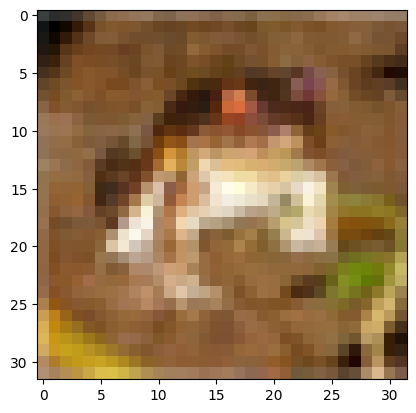

In [ ]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

In [ ]:
test_dataset = torchvision.datasets.CIFAR10(root=FOLDER_PATH,
                                            train=False,
                                            download=True,
                                            transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

In [ ]:

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
       # x = F.softmax(x)
        return x

    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 256, 10)

##optimizator - SDG
epochs = 30


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [ ]:
from tqdm import tqdm

In [ ]:
num_epochs = 30
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0



    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/30 [00:00<?, ?it/s]

[1,     1] loss: 0.001
[1,   301] loss: 0.344
[1,   601] loss: 0.337


  3%|▎         | 1/30 [00:24<11:48, 24.42s/it]

[2,     1] loss: 0.001
[2,   301] loss: 0.307
[2,   601] loss: 0.296


  7%|▋         | 2/30 [00:46<10:37, 22.76s/it]

[3,     1] loss: 0.001
[3,   301] loss: 0.287
[3,   601] loss: 0.283


 10%|█         | 3/30 [01:07<09:53, 21.97s/it]

[4,     1] loss: 0.001
[4,   301] loss: 0.275
[4,   601] loss: 0.272


 13%|█▎        | 4/30 [01:28<09:21, 21.61s/it]

[5,     1] loss: 0.001
[5,   301] loss: 0.267
[5,   601] loss: 0.264


 17%|█▋        | 5/30 [01:48<08:53, 21.35s/it]

[6,     1] loss: 0.001
[6,   301] loss: 0.257
[6,   601] loss: 0.256


 20%|██        | 6/30 [02:10<08:29, 21.23s/it]

[7,     1] loss: 0.001
[7,   301] loss: 0.250
[7,   601] loss: 0.248


 23%|██▎       | 7/30 [02:31<08:07, 21.18s/it]

[8,     1] loss: 0.001
[8,   301] loss: 0.246
[8,   601] loss: 0.243


 27%|██▋       | 8/30 [02:52<07:47, 21.25s/it]

[9,     1] loss: 0.001
[9,   301] loss: 0.239
[9,   601] loss: 0.237


 30%|███       | 9/30 [03:13<07:23, 21.11s/it]

[10,     1] loss: 0.001
[10,   301] loss: 0.234
[10,   601] loss: 0.234


 33%|███▎      | 10/30 [03:34<07:00, 21.04s/it]

[11,     1] loss: 0.001
[11,   301] loss: 0.230
[11,   601] loss: 0.228


 37%|███▋      | 11/30 [03:55<06:40, 21.06s/it]

[12,     1] loss: 0.001
[12,   301] loss: 0.225
[12,   601] loss: 0.223


 40%|████      | 12/30 [04:16<06:21, 21.18s/it]

[13,     1] loss: 0.001
[13,   301] loss: 0.220
[13,   601] loss: 0.221


 43%|████▎     | 13/30 [04:37<06:00, 21.20s/it]

[14,     1] loss: 0.001
[14,   301] loss: 0.218
[14,   601] loss: 0.215


 47%|████▋     | 14/30 [04:58<05:37, 21.10s/it]

[15,     1] loss: 0.001
[15,   301] loss: 0.213
[15,   601] loss: 0.214


 50%|█████     | 15/30 [05:19<05:15, 21.03s/it]

[16,     1] loss: 0.001
[16,   301] loss: 0.210
[16,   601] loss: 0.209


 53%|█████▎    | 16/30 [05:40<04:54, 21.07s/it]

[17,     1] loss: 0.001
[17,   301] loss: 0.209
[17,   601] loss: 0.205


 57%|█████▋    | 17/30 [06:02<04:34, 21.09s/it]

[18,     1] loss: 0.001
[18,   301] loss: 0.203
[18,   601] loss: 0.204


 60%|██████    | 18/30 [06:23<04:13, 21.14s/it]

[19,     1] loss: 0.001
[19,   301] loss: 0.201
[19,   601] loss: 0.201


 63%|██████▎   | 19/30 [06:44<03:52, 21.18s/it]

[20,     1] loss: 0.001
[20,   301] loss: 0.198
[20,   601] loss: 0.200


 67%|██████▋   | 20/30 [07:05<03:30, 21.06s/it]

[21,     1] loss: 0.001
[21,   301] loss: 0.196
[21,   601] loss: 0.195


 70%|███████   | 21/30 [07:26<03:09, 21.09s/it]

[22,     1] loss: 0.001
[22,   301] loss: 0.193
[22,   601] loss: 0.192


 73%|███████▎  | 22/30 [07:47<02:49, 21.14s/it]

[23,     1] loss: 0.001
[23,   301] loss: 0.192
[23,   601] loss: 0.190


 77%|███████▋  | 23/30 [08:09<02:28, 21.28s/it]

[24,     1] loss: 0.001
[24,   301] loss: 0.187
[24,   601] loss: 0.189


 80%|████████  | 24/30 [08:30<02:06, 21.14s/it]

[25,     1] loss: 0.001
[25,   301] loss: 0.186
[25,   601] loss: 0.187


 83%|████████▎ | 25/30 [08:51<01:45, 21.07s/it]

[26,     1] loss: 0.001
[26,   301] loss: 0.183
[26,   601] loss: 0.184


 87%|████████▋ | 26/30 [09:12<01:24, 21.06s/it]

[27,     1] loss: 0.001
[27,   301] loss: 0.180
[27,   601] loss: 0.183


 90%|█████████ | 27/30 [09:33<01:03, 21.10s/it]

[28,     1] loss: 0.001
[28,   301] loss: 0.178
[28,   601] loss: 0.180


 93%|█████████▎| 28/30 [09:54<00:42, 21.13s/it]

[29,     1] loss: 0.001
[29,   301] loss: 0.179
[29,   601] loss: 0.177


 97%|█████████▋| 29/30 [10:15<00:21, 21.04s/it]

[30,     1] loss: 0.001
[30,   301] loss: 0.176
[30,   601] loss: 0.176


100%|██████████| 30/30 [10:36<00:00, 21.21s/it]

Training is finished!


In [ ]:
PATH_WEIGHTS = 'C:/Users/Kate/Desktop/PT/cifar_net_weight.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [ ]:
print ('Model state dict:')
for param in net.state_dict():
    print(param, '\t', net.state_dict())

Model state dict:
fc1.weight 	 OrderedDict([('fc1.weight', tensor([[-0.0175,  0.0042, -0.0198,  ...,  0.0005,  0.0117, -0.0045],
        [-0.0188,  0.0038, -0.0084,  ..., -0.0100,  0.0086,  0.0128],
        [-0.0105,  0.0082,  0.0029,  ..., -0.0177, -0.0016,  0.0066],
        ...,
        [-0.0044, -0.0252,  0.0078,  ...,  0.0140, -0.0073, -0.0077],
        [ 0.0025,  0.0039, -0.0137,  ...,  0.0177, -0.0016, -0.0104],
        [-0.0188, -0.0300, -0.0276,  ..., -0.0065, -0.0009,  0.0045]])), ('fc1.bias', tensor([ 0.0171,  0.0065,  0.0481,  ..., -0.0017, -0.0064,  0.0125])), ('fc2.weight', tensor([[-0.0333, -0.0302,  0.0351,  ...,  0.0091,  0.0258,  0.0044],
        [ 0.0181, -0.0060,  0.0175,  ...,  0.0279, -0.0159,  0.0122],
        [ 0.0206, -0.0004,  0.0422,  ...,  0.0196,  0.0100,  0.0257],
        ...,
        [-0.0091, -0.0007,  0.0221,  ...,  0.0069, -0.0002,  0.0194],
        [-0.0021, -0.0307, -0.0123,  ...,  0.0244,  0.0079, -0.0174],
        [-0.0361, -0.0290, -0.0147,  ..., -

In [ ]:
net = Net(3072, 256, 10)
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

Net(
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

GroundTruth:  cat ship ship plane frog frog car frog


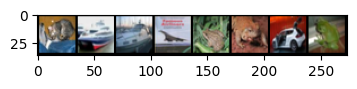

In [ ]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(4, 2))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [ ]:
net.predict(images);

<ipython-input-17-99276d73dfec>:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [ ]:
_, imgs_predicted = torch.max(outputs, 1)
imgs_predicted

tensor([3, 9, 0, 2, 4, 6, 3, 4])

In [ ]:
print('Predicted ', ' '.join(classes[imgs_predicted[j]] for j in range(len(labels))))

Predicted  cat truck plane bird deer frog cat deer


In [ ]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[imgs_predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'truck' 'plane' 'bird' 'deer' 'frog' 'cat' 'deer']
Accuracy is 0.25
